# Likelihood encoding benchmark

In [1]:
%matplotlib inline

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/adult/adult.data', header=None, names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])

In [3]:
import sys
sys.path.append('../codes/preprocessing/')
from preprocessing import preprocess

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from itertools import product

X = data.drop(['Target'], axis=1)
y = pd.DataFrame(data['Target'])

normalization = ['standard']
encoding = ['none', 'label', 'one-hot', 'likelihood']

for nrm, ecd in product(normalization, encoding):
    print(nrm.title(), '--', ecd.title())
    X_prep = preprocess(X, nrm, ecd)
    y_prep = preprocess(y, 'none', 'label')
    print('X shape: ', X_prep.shape)
    print('y shape: ', y_prep.shape)
    X_train, X_test, y_train, y_test = train_test_split(X_prep, y_prep, train_size=0.8, test_size=0.2)
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print('Train acc: ', accuracy_score(np.round(reg.predict(X_train)), y_train))
    print('Test acc: ', accuracy_score(np.round(reg.predict(X_test)), y_test))
    print('\n')

Standard -- None
X shape:  (32561, 6)
y shape:  (32561, 1)
Train acc:  0.7960304054054054
Test acc:  0.7999385843697221


Standard -- Label
X shape:  (32561, 14)
y shape:  (32561, 1)
Train acc:  0.8078163390663391
Test acc:  0.8066943037002917


Standard -- One-Hot
X shape:  (32561, 108)
y shape:  (32561, 1)
Train acc:  0.8377994471744472
Test acc:  0.8401658222017504


Standard -- Likelihood
X shape:  (32561, 14)
y shape:  (32561, 1)
Train acc:  0.828240171990172
Test acc:  0.8240442192538001




Computing model with standard normalization and label encoding...
X shape:  (32561, 14)
y shape:  (32561, 1)
Training finished in 46.88481307029724 s. 

Computing model with standard normalization and one-hot encoding...
X shape:  (32561, 108)
y shape:  (32561, 1)
Training finished in 48.79342460632324 s. 

Computing model with standard normalization and likelihood encoding...
X shape:  (32561, 14)
y shape:  (32561, 1)
Training finished in 47.338929176330566 s. 



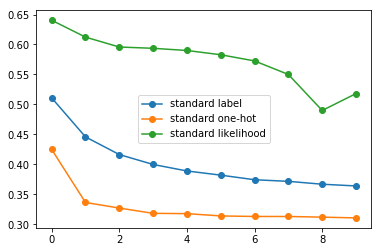

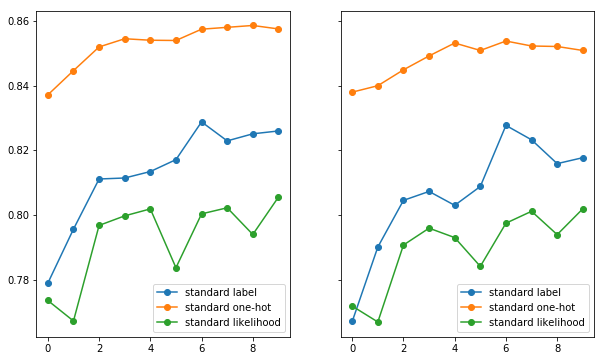

In [6]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../codes/models/')
import run_model
import time

# Normalization available = standard.
normalization = ['standard']
# Encoding available = label, one-hot, likelihood.
#encoding = ['none', 'label', 'one-hot', 'likelihood']
encoding = ['label', 'one-hot', 'likelihood']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

for nrm, ecd in product(normalization, encoding):
    print('Computing model with', nrm, 'normalization and', ecd, 'encoding...')
    X_prep = preprocess(X, nrm, ecd)
    y_prep = preprocess(y, 'none', 'label')
    print('X shape: ', X_prep.shape)
    print('y shape: ', y_prep.shape)
    X_train, X_test, y_train, y_test = train_test_split(X_prep, y_prep, train_size=0.8, test_size=0.2)
    
    t1 = time.time()
    losses, train_acc, test_acc = run_model.training(X_train, y_train, X_test, y_test)
    t2 = time.time()
    
    print('Training finished in', t2-t1, 's. \n')
    
    ax1.plot(losses, 'o-', label=nrm + ' ' +  ecd)
    ax2[0].plot(train_acc, 'o-', label=nrm + ' ' +  ecd)
    ax2[1].plot(test_acc, 'o-', label=nrm + ' ' +  ecd)
    
ax1.legend()
ax2[0].legend()
ax2[1].legend()
plt.show()